In [223]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('white')

## Loading the dataset

The mbox file has been parsed into a csv file which is loaded for further analysis in this notebook.

In [224]:
mail_df = pd.read_csv('mails.csv').drop(columns='Unnamed: 0')
mail_df.head()

,Date,Message-ID,From,To,Subject
0,"Fri, 30 Oct 2020 14:13:48 +0000 (UTC)",<x3gKjR2OSyC8r1fHpuFGHw@ismtpd0067p1mdw1.sendg...,OYO <crm@em.oyorooms.com>,samvram.iist@gmail.com,=?utf-8?q?Samvram=2C_read_news_you_can_believe...
1,"Fri, 30 Oct 2020 09:18:51 -0600",<e74ce458-a0a0-4b29-92c7-6008f6f9304b@ind1s01m...,"""Manchester United"" <manutd@email.manutd.com>",<samvram.iist@gmail.com>,Welcome to the Theatre of Dreams
2,"Fri, 30 Oct 2020 12:37:35 +0000 (UTC)",<199642409.62307982.1604061454790.JavaMail.app...,Paytm <no-reply@paytm.com>,samvram.iist@gmail.com,Rs.545 added successfully.
3,"Sun, 1 Nov 2020 04:09:25 +0000",<0100017581feded7-209dfaf8-2274-41b0-917f-90d9...,PORTER <no-reply@theporter.in>,samvram.iist@gmail.com,=?UTF-8?Q?Rs_=F0=9F=92=B810_=3D_Porter's_2_Whe...
4,"Sat, 31 Oct 2020 18:43:46 +0000",<010001757ff8ff2e-2fdc8a97-b05b-466e-b1dd-a542...,Reddit <noreply@redditmail.com>,samvram.iist@gmail.com,"""How a trillion dollar company thanks it's em..."""


In [225]:
mail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39584 entries, 0 to 39583
Data columns (total 5 columns):
Date          35756 non-null object
Message-ID    35756 non-null object
From          39513 non-null object
To            35699 non-null object
Subject       35586 non-null object
dtypes: object(5)
memory usage: 1.5+ MB


## Data Cleaning

In this section we see why some of the important fields are blank, and try to figure out why most probably we are facing blank values in our data.

In [226]:
print(mail_df.isnull().sum().sort_values())


From            71
Date          3828
Message-ID    3828
To            3885
Subject       3998
dtype: int64


The first observation we can see here is that `Date` and `Message-ID` have same number of null values, next we check if the index where they are null are correlated

In [227]:
mail_df.Date.isnull().sum()-len(mail_df[(mail_df.Date.isnull())&(mail_df['Message-ID'].isnull())])

0

Since the above symmetric difference is zero, we can say that there is a 100 percent correlation between the cases where `Message-ID` and `Date` have null values, next we will check the rows where they are zero to see why these are possibly zero

In [228]:
mail_df[mail_df.Date.isnull()].head()

,Date,Message-ID,From,To,Subject
575,NaN,NaN,Deborina Saloni Augustus <debbieaugustus2000@g...,NaN,NaN
576,NaN,NaN,Deborina Saloni Augustus <debbieaugustus2000@g...,NaN,NaN
577,NaN,NaN,Deborina Saloni Augustus <debbieaugustus2000@g...,NaN,NaN
578,NaN,NaN,Deborina Saloni Augustus <debbieaugustus2000@g...,NaN,NaN
579,NaN,NaN,Deborina Saloni Augustus <debbieaugustus2000@g...,NaN,NaN


In [229]:
mail_df[mail_df.Date.isnull()].From.value_counts()

Samvram Sahu <samvram.iist@gmail.com>                                 1728
Debbie Augustus <debbieaugustus2000@gmail.com>                         692
shraddha priyadarshini <shraddhaguddi173@gmail.com>                    378
Sudhansu BALA DAS <baladas.sudhansu@gmail.com>                         334
Litu Rout <liturout1997@gmail.com>                                     143
Deborina Saloni Augustus <debbieaugustus2000@gmail.com>                141
neha choudhary <reply-101351530842612945061@profiles.google.com>        76
"debbieaugustus2000@gmail.com" <debbieaugustus2000@gmail.com>           69
Suhail Mohammed <amsuhailmohammed@gmail.com>                            57
Reuben CT <reubenct@gmail.com>                                          44
Ankit verma <reply-115508150252509770127@profiles.google.com>           23
Ankit verma <ankitvermajnp@gmail.com>                                   21
TADASA GADNAYAK <tadasagadnayak1997@gmail.com>                          13
Arnab Karmakar <arnabkarm

In [230]:
hangouts = mail_df[mail_df.Date.isnull()]
mail_df = mail_df[~mail_df.Date.isnull()]
mail_df.isnull().sum().sort_values()

Date            0
Message-ID      0
From            0
To             57
Subject       170
dtype: int64

Wow, most part of the data is clean, only few null rows remain, let us look into the cases

In [231]:
mail_df[mail_df.To.isnull()].head()

,Date,Message-ID,From,To,Subject
161,"Wed, 21 Oct 2020 08:18:56 +0000 (UTC)",<1529415178.2718820.1603268336915@mail.yahoo.com>,"""Mrs. Bridggie William"" <mrssbridggiee11willia...",NaN,From Mrs Bridggie William writing from hospital
1135,"Thu, 17 Sep 2020 00:20:25 +0530",<CA+QhxK1YVQfqBR-c6F0a-wyFSZ+RFjFHas8zNmSQU5Jk...,Ramachandran Shankar <shankar.chennai@gmail.com>,NaN,[ISRC] [General] A report on the data of covid...
1994,"Mon, 26 Oct 2020 18:42:45 +0000 (UTC)",<111081760.5671623.1603737765977@mail.yahoo.com>,"""Mrs. Bridggie William"" <mrsbridggie1williiam@...",NaN,From Mrs Bridggie William writing from hospital
4268,"Tue, 14 Jul 2020 15:12:27 +0530",<CA+X=ih6pdfn9sOj6wKxQMprt0YThpNRSuB677A8k948P...,Samvram Sahu <samvram.iist@gmail.com>,NaN,NaN
4380,"Fri, 17 Jul 2020 11:32:56 +0530",<CA+X=ih4NWzSJC0N2tq3aoc0B=tja8tTXwr49VJ1RMsUe...,Samvram Sahu <samvram.iist@gmail.com>,NaN,NaN


Upon a detailed analysis of this project, I can assume that these emails comprise of 3 categories:
Two explanations:
- BCC or sent as a Group Mail (Mailers)
- Spam
- Draft

It is then safe to drop all the above and move ahead in our process of data cleaning.

In [232]:
mail_df = mail_df[~mail_df.To.isnull()]
mail_df.isnull().sum()

Date            0
Message-ID      0
From            0
To              0
Subject       161
dtype: int64

As Emails with no subjects exist and can still be classified as emails, we can safely say we have completed the part of Data Cleaning.

## Data Standardization

It is very important to standardize data and hence we look forward to standardize data, and create columns as necessary.

In [233]:
mail_df.head()

,Date,Message-ID,From,To,Subject
0,"Fri, 30 Oct 2020 14:13:48 +0000 (UTC)",<x3gKjR2OSyC8r1fHpuFGHw@ismtpd0067p1mdw1.sendg...,OYO <crm@em.oyorooms.com>,samvram.iist@gmail.com,=?utf-8?q?Samvram=2C_read_news_you_can_believe...
1,"Fri, 30 Oct 2020 09:18:51 -0600",<e74ce458-a0a0-4b29-92c7-6008f6f9304b@ind1s01m...,"""Manchester United"" <manutd@email.manutd.com>",<samvram.iist@gmail.com>,Welcome to the Theatre of Dreams
2,"Fri, 30 Oct 2020 12:37:35 +0000 (UTC)",<199642409.62307982.1604061454790.JavaMail.app...,Paytm <no-reply@paytm.com>,samvram.iist@gmail.com,Rs.545 added successfully.
3,"Sun, 1 Nov 2020 04:09:25 +0000",<0100017581feded7-209dfaf8-2274-41b0-917f-90d9...,PORTER <no-reply@theporter.in>,samvram.iist@gmail.com,=?UTF-8?Q?Rs_=F0=9F=92=B810_=3D_Porter's_2_Whe...
4,"Sat, 31 Oct 2020 18:43:46 +0000",<010001757ff8ff2e-2fdc8a97-b05b-466e-b1dd-a542...,Reddit <noreply@redditmail.com>,samvram.iist@gmail.com,"""How a trillion dollar company thanks it's em..."""


The first column i.e. `Date` is having values in string format, we will convert to datetime object

In [234]:
mail_df.Date = pd.to_datetime(mail_df.Date.apply(lambda x:x[0:31]), format='%a, %d %b %Y %H:%M:%S %z', errors='coerce')
mail_df.head()

,Date,Message-ID,From,To,Subject
0,2020-10-30 14:13:48+00:00,<x3gKjR2OSyC8r1fHpuFGHw@ismtpd0067p1mdw1.sendg...,OYO <crm@em.oyorooms.com>,samvram.iist@gmail.com,=?utf-8?q?Samvram=2C_read_news_you_can_believe...
1,2020-10-30 09:18:51-06:00,<e74ce458-a0a0-4b29-92c7-6008f6f9304b@ind1s01m...,"""Manchester United"" <manutd@email.manutd.com>",<samvram.iist@gmail.com>,Welcome to the Theatre of Dreams
2,2020-10-30 12:37:35+00:00,<199642409.62307982.1604061454790.JavaMail.app...,Paytm <no-reply@paytm.com>,samvram.iist@gmail.com,Rs.545 added successfully.
3,2020-11-01 04:09:25+00:00,<0100017581feded7-209dfaf8-2274-41b0-917f-90d9...,PORTER <no-reply@theporter.in>,samvram.iist@gmail.com,=?UTF-8?Q?Rs_=F0=9F=92=B810_=3D_Porter's_2_Whe...
4,2020-10-31 18:43:46+00:00,<010001757ff8ff2e-2fdc8a97-b05b-466e-b1dd-a542...,Reddit <noreply@redditmail.com>,samvram.iist@gmail.com,"""How a trillion dollar company thanks it's em..."""


In [235]:
mail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35699 entries, 0 to 39583
Data columns (total 5 columns):
Date          33854 non-null object
Message-ID    35699 non-null object
From          35699 non-null object
To            35699 non-null object
Subject       35538 non-null object
dtypes: object(5)
memory usage: 1.6+ MB


Since the percentage of cases which are null are very less they have been successfully removed.

In [236]:
mail_df = mail_df[~mail_df.Date.isnull()]
mail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33854 entries, 0 to 39583
Data columns (total 5 columns):
Date          33854 non-null object
Message-ID    33854 non-null object
From          33854 non-null object
To            33854 non-null object
Subject       33693 non-null object
dtypes: object(5)
memory usage: 1.5+ MB


In [237]:
mail_df.head()

,Date,Message-ID,From,To,Subject
0,2020-10-30 14:13:48+00:00,<x3gKjR2OSyC8r1fHpuFGHw@ismtpd0067p1mdw1.sendg...,OYO <crm@em.oyorooms.com>,samvram.iist@gmail.com,=?utf-8?q?Samvram=2C_read_news_you_can_believe...
1,2020-10-30 09:18:51-06:00,<e74ce458-a0a0-4b29-92c7-6008f6f9304b@ind1s01m...,"""Manchester United"" <manutd@email.manutd.com>",<samvram.iist@gmail.com>,Welcome to the Theatre of Dreams
2,2020-10-30 12:37:35+00:00,<199642409.62307982.1604061454790.JavaMail.app...,Paytm <no-reply@paytm.com>,samvram.iist@gmail.com,Rs.545 added successfully.
3,2020-11-01 04:09:25+00:00,<0100017581feded7-209dfaf8-2274-41b0-917f-90d9...,PORTER <no-reply@theporter.in>,samvram.iist@gmail.com,=?UTF-8?Q?Rs_=F0=9F=92=B810_=3D_Porter's_2_Whe...
4,2020-10-31 18:43:46+00:00,<010001757ff8ff2e-2fdc8a97-b05b-466e-b1dd-a542...,Reddit <noreply@redditmail.com>,samvram.iist@gmail.com,"""How a trillion dollar company thanks it's em..."""


## Creating New Columns

We shall create new columns from existing ones like hour_of_the_day, month, day_of_week, email_domain, Sender_Abbreviation etc

In [238]:
mail_df['Year'] = mail_df.Date.apply(lambda x:x.year)
mail_df['Month'] = mail_df.Date.apply(lambda x:x.month)
mail_df['Week'] = mail_df.Date.apply(lambda x:x.week)
mail_df['Day'] = mail_df.Date.apply(lambda x:x.day)
mail_df['DayOfWeek'] = mail_df.Date.apply(lambda x:x.dayofweek)
mail_df['Hour'] = mail_df.Date.apply(lambda x:x.hour + x.minute/60)
mail_df['Hour_Discrete'] = mail_df.Date.apply(lambda x:x.hour)
mail_df.head()

,Date,Message-ID,From,To,Subject,Year,Month,Week,Day,DayOfWeek,Hour,Hour_Discrete
0,2020-10-30 14:13:48+00:00,<x3gKjR2OSyC8r1fHpuFGHw@ismtpd0067p1mdw1.sendg...,OYO <crm@em.oyorooms.com>,samvram.iist@gmail.com,=?utf-8?q?Samvram=2C_read_news_you_can_believe...,2020,10,44,30,4,14.216667,14
1,2020-10-30 09:18:51-06:00,<e74ce458-a0a0-4b29-92c7-6008f6f9304b@ind1s01m...,"""Manchester United"" <manutd@email.manutd.com>",<samvram.iist@gmail.com>,Welcome to the Theatre of Dreams,2020,10,44,30,4,9.300000,9
2,2020-10-30 12:37:35+00:00,<199642409.62307982.1604061454790.JavaMail.app...,Paytm <no-reply@paytm.com>,samvram.iist@gmail.com,Rs.545 added successfully.,2020,10,44,30,4,12.616667,12
3,2020-11-01 04:09:25+00:00,<0100017581feded7-209dfaf8-2274-41b0-917f-90d9...,PORTER <no-reply@theporter.in>,samvram.iist@gmail.com,=?UTF-8?Q?Rs_=F0=9F=92=B810_=3D_Porter's_2_Whe...,2020,11,44,1,6,4.150000,4
4,2020-10-31 18:43:46+00:00,<010001757ff8ff2e-2fdc8a97-b05b-466e-b1dd-a542...,Reddit <noreply@redditmail.com>,samvram.iist@gmail.com,"""How a trillion dollar company thanks it's em...""",2020,10,44,31,5,18.716667,18


In [239]:
mail_df['From_Short'] = mail_df.From.apply(lambda x:x.split('<')[0].strip().strip('""'))
mail_df['From_Email'] = mail_df.From.apply(lambda x:x.split('<')[-1].split('>')[0].strip())

mail_df['To_Short'] = mail_df.To.apply(lambda x:x.split('<')[0].strip().strip('""'))
mail_df['To_Email'] = mail_df.To.apply(lambda x:x.split('<')[-1].split('>')[0].strip())

In [240]:
mail_df.head()

,Date,Message-ID,From,To,Subject,Year,Month,Week,Day,DayOfWeek,Hour,Hour_Discrete,From_Short,From_Email,To_Short,To_Email
0,2020-10-30 14:13:48+00:00,<x3gKjR2OSyC8r1fHpuFGHw@ismtpd0067p1mdw1.sendg...,OYO <crm@em.oyorooms.com>,samvram.iist@gmail.com,=?utf-8?q?Samvram=2C_read_news_you_can_believe...,2020,10,44,30,4,14.216667,14,OYO,crm@em.oyorooms.com,samvram.iist@gmail.com,samvram.iist@gmail.com
1,2020-10-30 09:18:51-06:00,<e74ce458-a0a0-4b29-92c7-6008f6f9304b@ind1s01m...,"""Manchester United"" <manutd@email.manutd.com>",<samvram.iist@gmail.com>,Welcome to the Theatre of Dreams,2020,10,44,30,4,9.300000,9,Manchester United,manutd@email.manutd.com,,samvram.iist@gmail.com
2,2020-10-30 12:37:35+00:00,<199642409.62307982.1604061454790.JavaMail.app...,Paytm <no-reply@paytm.com>,samvram.iist@gmail.com,Rs.545 added successfully.,2020,10,44,30,4,12.616667,12,Paytm,no-reply@paytm.com,samvram.iist@gmail.com,samvram.iist@gmail.com
3,2020-11-01 04:09:25+00:00,<0100017581feded7-209dfaf8-2274-41b0-917f-90d9...,PORTER <no-reply@theporter.in>,samvram.iist@gmail.com,=?UTF-8?Q?Rs_=F0=9F=92=B810_=3D_Porter's_2_Whe...,2020,11,44,1,6,4.150000,4,PORTER,no-reply@theporter.in,samvram.iist@gmail.com,samvram.iist@gmail.com
4,2020-10-31 18:43:46+00:00,<010001757ff8ff2e-2fdc8a97-b05b-466e-b1dd-a542...,Reddit <noreply@redditmail.com>,samvram.iist@gmail.com,"""How a trillion dollar company thanks it's em...""",2020,10,44,31,5,18.716667,18,Reddit,noreply@redditmail.com,samvram.iist@gmail.com,samvram.iist@gmail.com


In [241]:
mail_df = mail_df[mail_df.From_Email.apply(lambda x:'@' in x)]
mail_df['From_Domain'] = mail_df.From_Email.apply(lambda x:x.split('@')[1].strip())
mail_df['From_Username'] = mail_df.From_Email.apply(lambda x:x.split('@')[0].strip())

mail_df = mail_df[mail_df.To_Email.apply(lambda x:'@' in x)]
mail_df['To_Domain'] = mail_df.To_Email.apply(lambda x:x.split('@')[1].strip())
mail_df['To_Username'] = mail_df.To_Email.apply(lambda x:x.split('@')[0].strip())
mail_df.head()

,Date,Message-ID,From,To,Subject,Year,Month,Week,Day,DayOfWeek,Hour,Hour_Discrete,From_Short,From_Email,To_Short,To_Email,From_Domain,From_Username,To_Domain,To_Username
0,2020-10-30 14:13:48+00:00,<x3gKjR2OSyC8r1fHpuFGHw@ismtpd0067p1mdw1.sendg...,OYO <crm@em.oyorooms.com>,samvram.iist@gmail.com,=?utf-8?q?Samvram=2C_read_news_you_can_believe...,2020,10,44,30,4,14.216667,14,OYO,crm@em.oyorooms.com,samvram.iist@gmail.com,samvram.iist@gmail.com,em.oyorooms.com,crm,gmail.com,samvram.iist
1,2020-10-30 09:18:51-06:00,<e74ce458-a0a0-4b29-92c7-6008f6f9304b@ind1s01m...,"""Manchester United"" <manutd@email.manutd.com>",<samvram.iist@gmail.com>,Welcome to the Theatre of Dreams,2020,10,44,30,4,9.300000,9,Manchester United,manutd@email.manutd.com,,samvram.iist@gmail.com,email.manutd.com,manutd,gmail.com,samvram.iist
2,2020-10-30 12:37:35+00:00,<199642409.62307982.1604061454790.JavaMail.app...,Paytm <no-reply@paytm.com>,samvram.iist@gmail.com,Rs.545 added successfully.,2020,10,44,30,4,12.616667,12,Paytm,no-reply@paytm.com,samvram.iist@gmail.com,samvram.iist@gmail.com,paytm.com,no-reply,gmail.com,samvram.iist
3,2020-11-01 04:09:25+00:00,<0100017581feded7-209dfaf8-2274-41b0-917f-90d9...,PORTER <no-reply@theporter.in>,samvram.iist@gmail.com,=?UTF-8?Q?Rs_=F0=9F=92=B810_=3D_Porter's_2_Whe...,2020,11,44,1,6,4.150000,4,PORTER,no-reply@theporter.in,samvram.iist@gmail.com,samvram.iist@gmail.com,theporter.in,no-reply,gmail.com,samvram.iist
4,2020-10-31 18:43:46+00:00,<010001757ff8ff2e-2fdc8a97-b05b-466e-b1dd-a542...,Reddit <noreply@redditmail.com>,samvram.iist@gmail.com,"""How a trillion dollar company thanks it's em...""",2020,10,44,31,5,18.716667,18,Reddit,noreply@redditmail.com,samvram.iist@gmail.com,samvram.iist@gmail.com,redditmail.com,noreply,gmail.com,samvram.iist


In [242]:
mail_df['Sent'] = mail_df.From.apply(lambda x:'samvram.iist@gmail.com' in x)
mail_df['Received'] = mail_df.To.apply(lambda x:'samvram.iist@gmail.com' in x)

print(mail_df.Sent.sum(), mail_df.Received.sum())

1853 27897


## Univariate Analysis

### Overall Email by Date/Month/Time/Week

Text(0.5, 1.0, 'Hour of Day vs No of Emails (Total)')

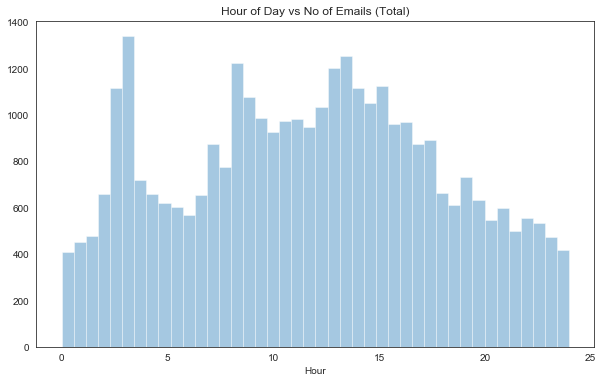

In [243]:
plt.figure(figsize=(10, 6))
sns.distplot(mail_df.Hour, kde=False)
plt.title('Hour of Day vs No of Emails (Total)')

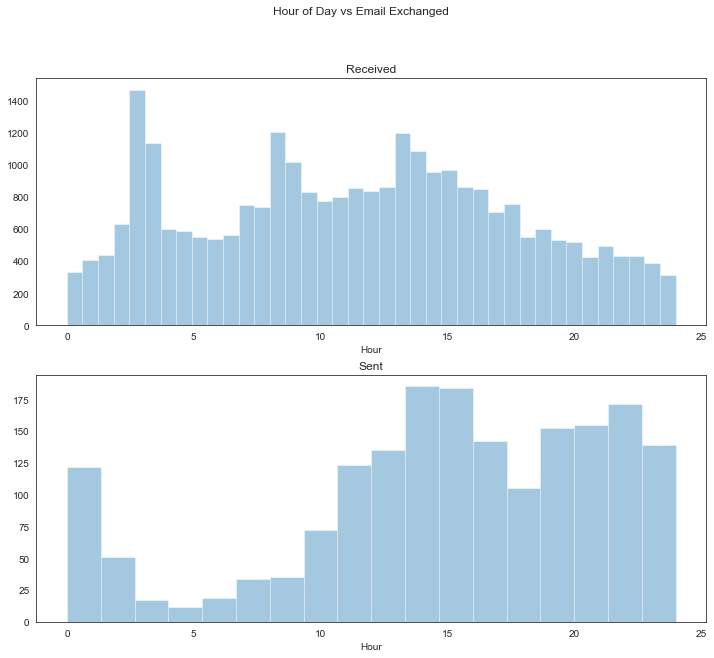

In [244]:
fig, ax = plt.subplots(2, 1, figsize=(12,10))
plt.suptitle('Hour of Day vs Email Exchanged')

ax[0].set_title('Received')
sns.distplot(mail_df[mail_df.Received].Hour, ax=ax[0], kde=False)

ax[1].set_title('Sent')
sns.distplot(mail_df[mail_df.Sent].Hour, ax=ax[1], kde=False)

Text(0.5, 1.0, 'Months vs No of Emails (Total)')

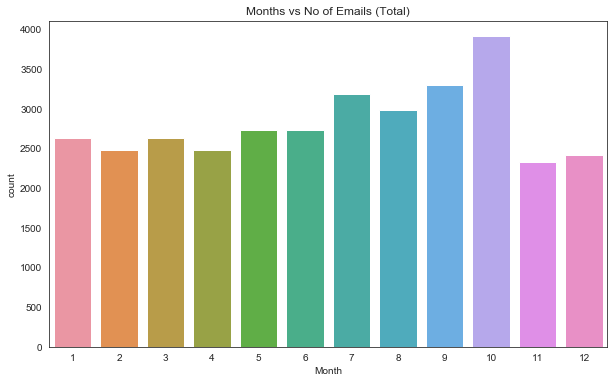

In [245]:
plt.figure(figsize=(10, 6))
sns.countplot(mail_df.Month)
plt.title('Months vs No of Emails (Total)')

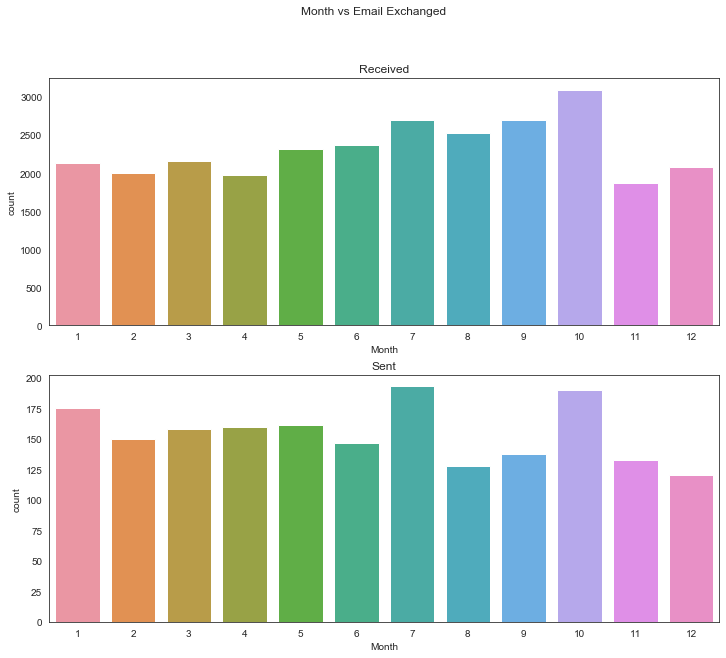

In [246]:
fig, ax = plt.subplots(2, 1, figsize=(12,10))
plt.suptitle('Month vs Email Exchanged')

ax[0].set_title('Received')
sns.countplot(mail_df[mail_df.Received].Month, ax=ax[0])

ax[1].set_title('Sent')
sns.countplot(mail_df[mail_df.Sent].Month, ax=ax[1])

Text(0.5, 1.0, 'Years vs No of Images')

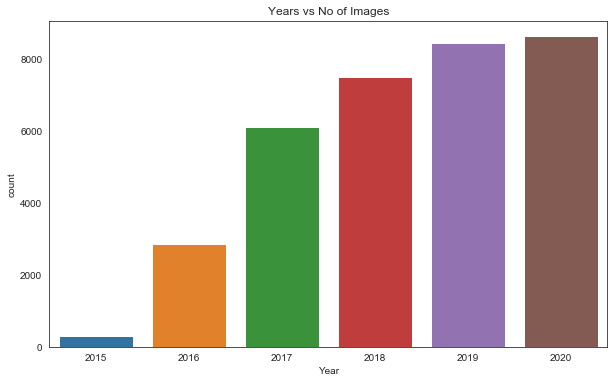

In [247]:
plt.figure(figsize=(10, 6))
sns.countplot(mail_df.Year)
plt.title('Years vs No of Images')

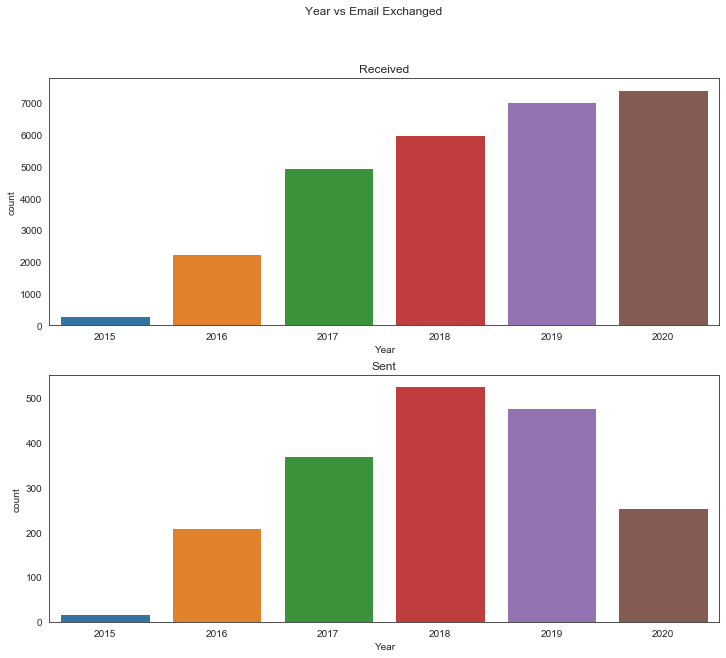

In [248]:
fig, ax = plt.subplots(2, 1, figsize=(12,10))
plt.suptitle('Year vs Email Exchanged')

ax[0].set_title('Received')
sns.countplot(mail_df[mail_df.Received].Year, ax=ax[0])

ax[1].set_title('Sent')
sns.countplot(mail_df[mail_df.Sent].Year, ax=ax[1])

Text(0.5, 1.0, 'Day of Week vs No of Images')

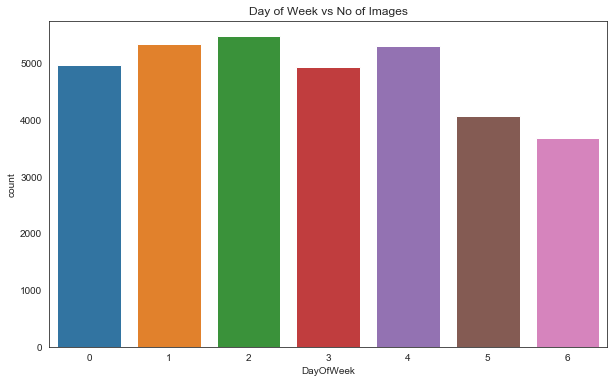

In [249]:
plt.figure(figsize=(10, 6))
sns.countplot(mail_df.DayOfWeek)
plt.title('Day of Week vs No of Images')

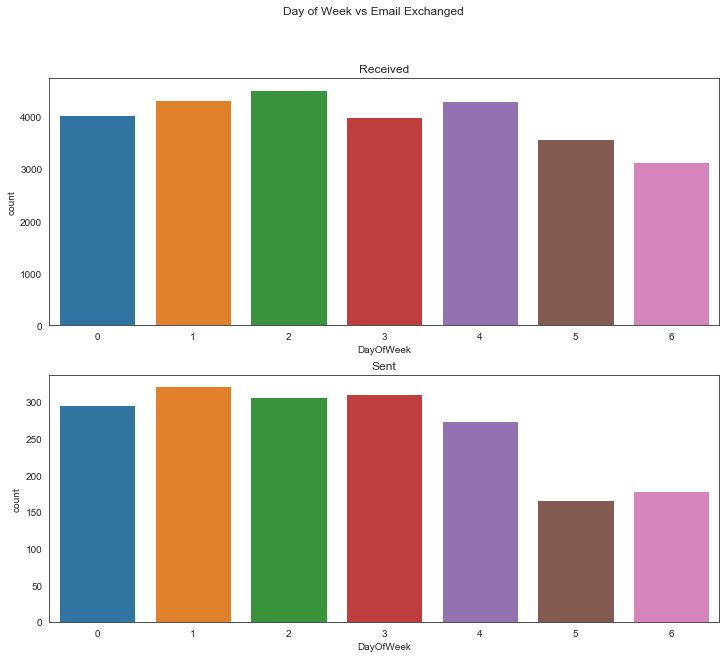

In [250]:
fig, ax = plt.subplots(2, 1, figsize=(12,10))
plt.suptitle('Day of Week vs Email Exchanged')

ax[0].set_title('Received')
sns.countplot(mail_df[mail_df.Received].DayOfWeek, ax=ax[0])

ax[1].set_title('Sent')
sns.countplot(mail_df[mail_df.Sent].DayOfWeek, ax=ax[1])

Text(0.5, 1.0, 'Day of Month vs No of Images')

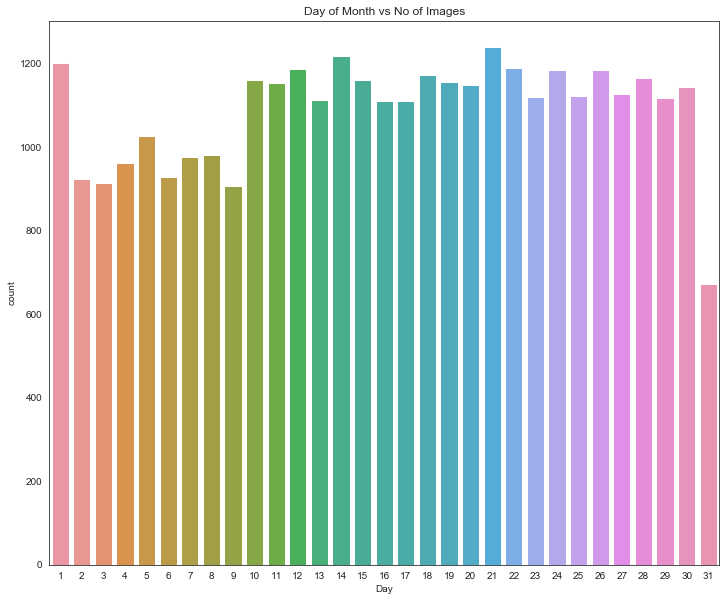

In [251]:
plt.figure(figsize=(12, 10))
sns.countplot(mail_df.Day)
plt.title('Day of Month vs No of Images')

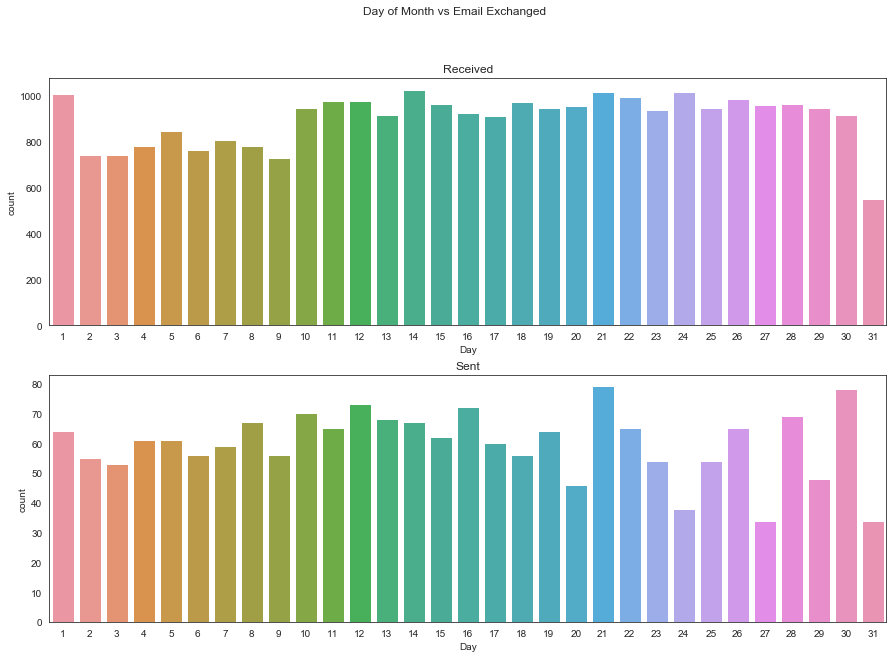

In [252]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))
plt.suptitle('Day of Month vs Email Exchanged')

ax[0].set_title('Received')
sns.countplot(mail_df[mail_df.Received].Day, ax=ax[0])

ax[1].set_title('Sent')
sns.countplot(mail_df[mail_df.Sent].Day, ax=ax[1])

Text(0.5, 1.0, 'Week of Year vs No of Images')

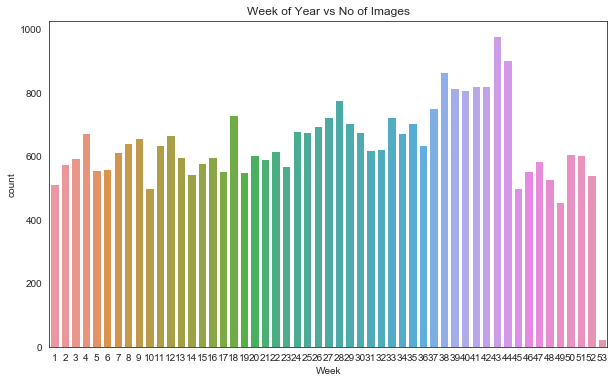

In [253]:
plt.figure(figsize=(10, 6))
sns.countplot(mail_df.Week)
plt.title('Week of Year vs No of Images')

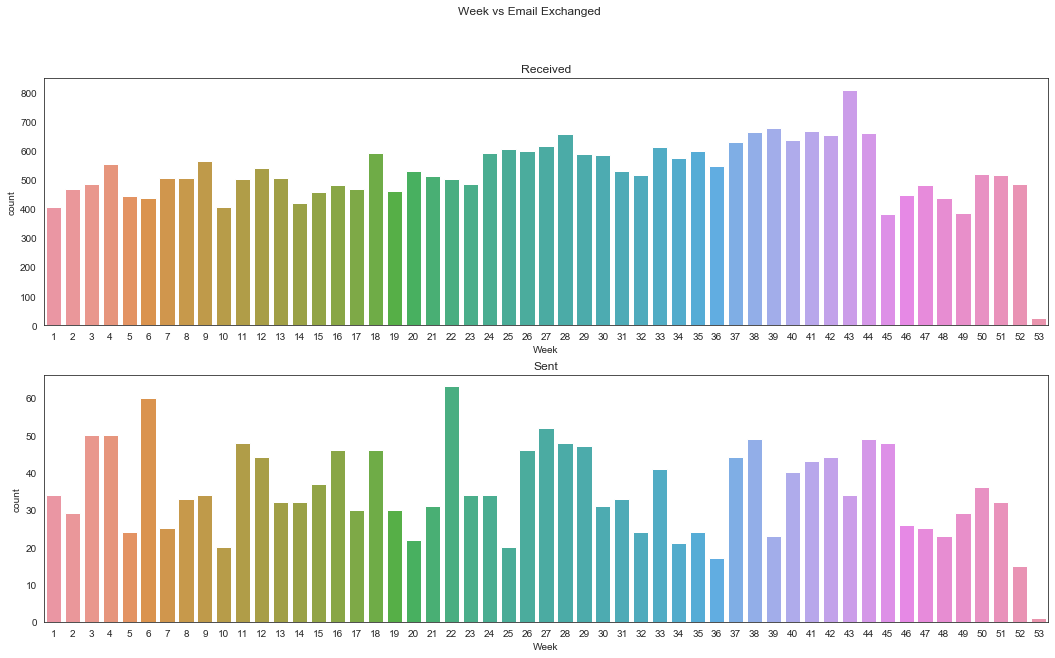

In [254]:
fig, ax = plt.subplots(2, 1, figsize=(18,10))
plt.suptitle('Week vs Email Exchanged')

ax[0].set_title('Received')
sns.countplot(mail_df[mail_df.Received].Week, ax=ax[0])

ax[1].set_title('Sent')
sns.countplot(mail_df[mail_df.Sent].Week, ax=ax[1])

### Received Email Characteristics

Text(0.5, 1.0, 'Received emails from Top 10 Domains')

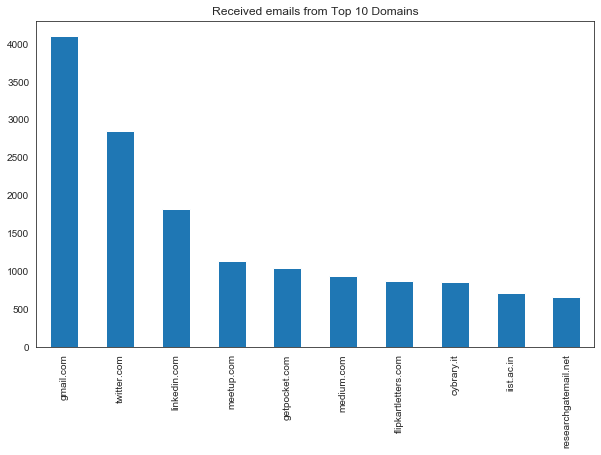

In [255]:
plt.figure(figsize=(10, 6))
mail_df.From_Domain.value_counts().sort_values(ascending=False)[:10].plot.bar()
plt.title('Received emails from Top 10 Domains')

Text(0.5, 1.0, 'Received emails from Top 10 Usernames')

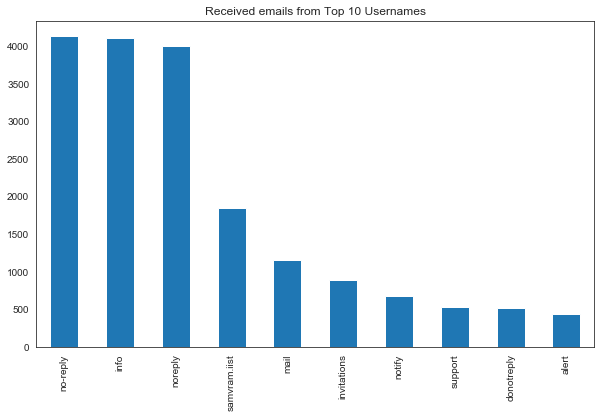

In [256]:
plt.figure(figsize=(10, 6))
mail_df.From_Username.value_counts().sort_values(ascending=False)[:10].plot.bar()
plt.title('Received emails from Top 10 Usernames')

Text(0.5, 1.0, 'Received emails from Top 10 emails')

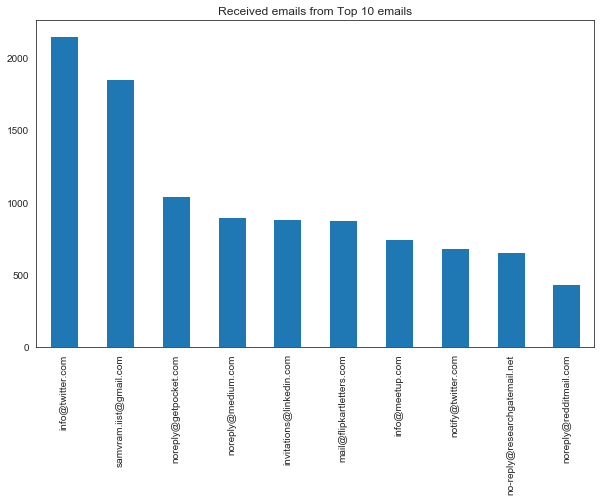

In [257]:
plt.figure(figsize=(10, 6))
mail_df.From_Email.value_counts().sort_values(ascending=False)[:10].plot.bar()
plt.title('Received emails from Top 10 emails')

Text(0.5, 1.0, 'Received emails from Top 10 Short Addresses')

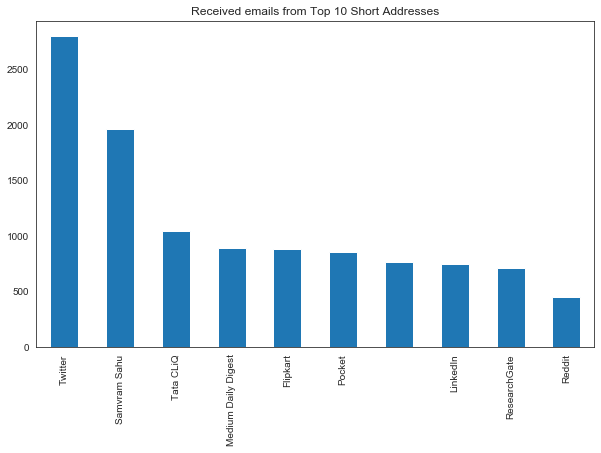

In [258]:
plt.figure(figsize=(10, 6))
mail_df.From_Short.value_counts().sort_values(ascending=False)[:10].plot.bar()
plt.title('Received emails from Top 10 Short Addresses')

### Sent Email Analysis

Text(0.5, 1.0, 'Sent emails to Top 10 Domains')

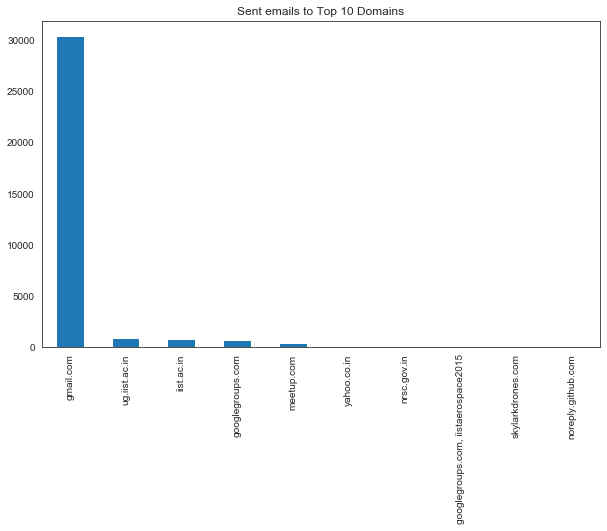

In [259]:
plt.figure(figsize=(10, 6))
mail_df.To_Domain.value_counts().sort_values(ascending=False)[:10].plot.bar()
plt.title('Sent emails to Top 10 Domains')

Text(0.5, 1.0, 'Sent emails to Top 10 Usernames')

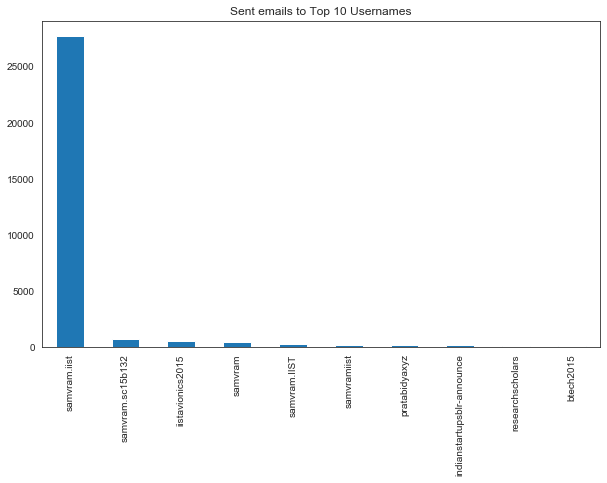

In [260]:
plt.figure(figsize=(10, 6))
mail_df.To_Username.value_counts().sort_values(ascending=False)[:10].plot.bar()
plt.title('Sent emails to Top 10 Usernames')

Text(0.5, 1.0, 'Sent emails to Top 10 emails')

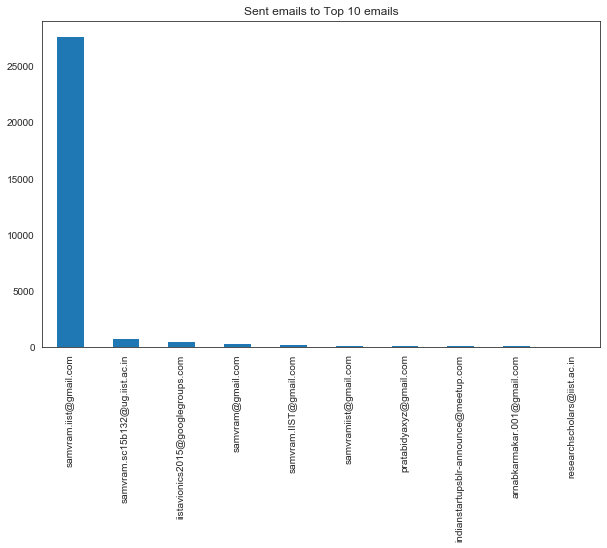

In [261]:
plt.figure(figsize=(10, 6))
mail_df.To_Email.value_counts().sort_values(ascending=False)[:10].plot.bar()
plt.title('Sent emails to Top 10 emails')

Text(0.5, 1.0, 'Sent emails to Top 10 Short Addresses')

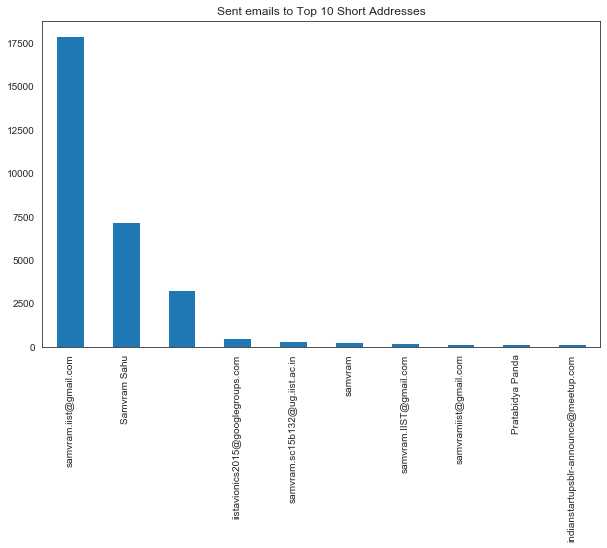

In [262]:
plt.figure(figsize=(10, 6))
mail_df.To_Short.value_counts().sort_values(ascending=False)[:10].plot.bar()
plt.title('Sent emails to Top 10 Short Addresses')

## Bivariate Analysis

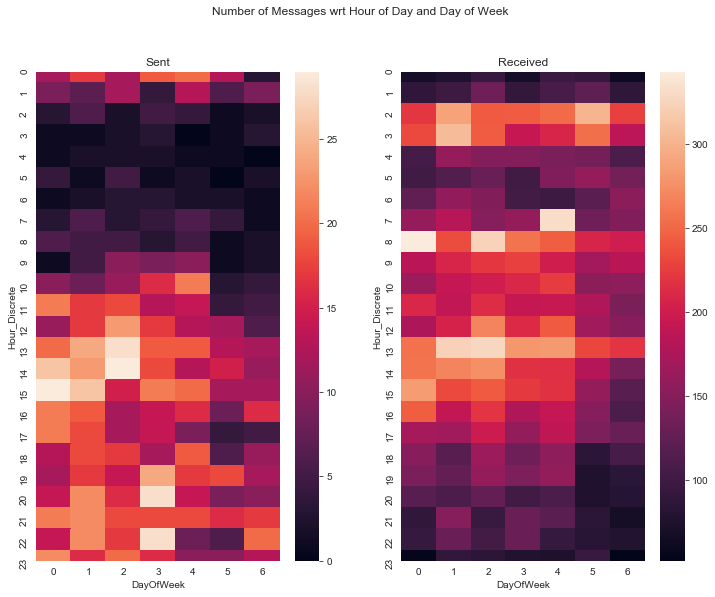

In [263]:
fig, ax = plt.subplots(1, 2, figsize=(12,9))

plt.suptitle('Number of Messages wrt Hour of Day and Day of Week')

ax[0].set_title('Sent')
ax[1].set_title('Received')
sns.heatmap(mail_df[mail_df.Sent].pivot_table(index='Hour_Discrete', columns='DayOfWeek', values='Message-ID', aggfunc='count', fill_value=0), ax=ax[0])
sns.heatmap(mail_df[mail_df.Received].pivot_table(index='Hour_Discrete', columns='DayOfWeek', values='Message-ID', aggfunc='count', fill_value=0), ax=ax[1])

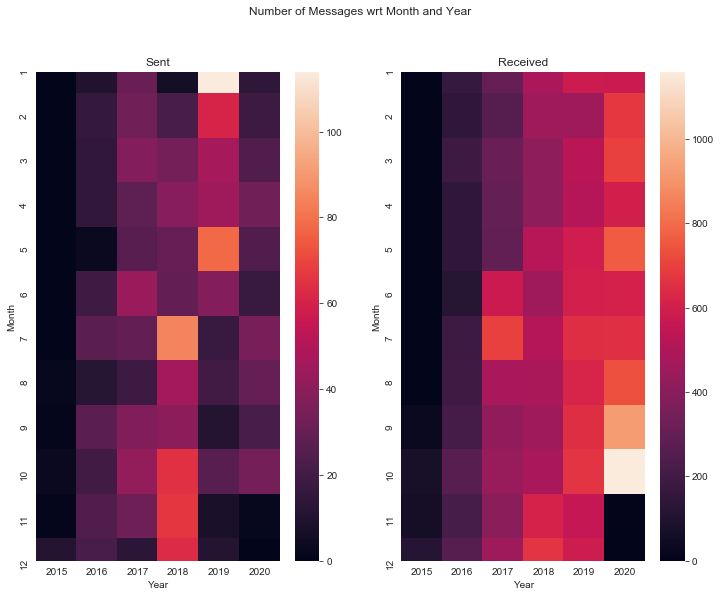

In [264]:
fig, ax = plt.subplots(1, 2, figsize=(12,9))

plt.suptitle('Number of Messages wrt Month and Year')

ax[0].set_title('Sent')
ax[1].set_title('Received')
sns.heatmap(mail_df[mail_df.Sent].pivot_table(index='Month', columns='Year', values='Message-ID', aggfunc='count', fill_value=0), ax=ax[0])
sns.heatmap(mail_df[mail_df.Received].pivot_table(index='Month', columns='Year', values='Message-ID', aggfunc='count', fill_value=0), ax=ax[1])

Text(0.5, 1, 'Weekly vs Hourly')

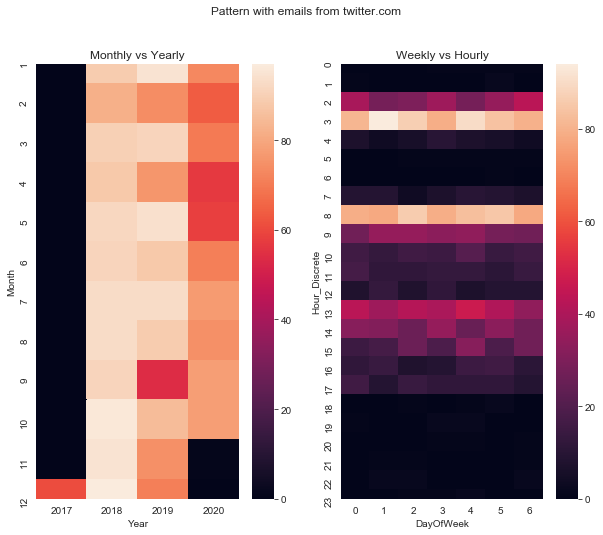

In [273]:
fig, ax = plt.subplots(1,2, figsize=(10,8))
domain = 'twitter.com'
plt.suptitle('Pattern with emails from %s'%domain)
sns.heatmap(mail_df[mail_df.From_Domain==domain].pivot_table(index='Month', columns='Year', values='Message-ID', aggfunc='count', fill_value=0), ax=ax[0])
sns.heatmap(mail_df[mail_df.From_Domain==domain].pivot_table(index='Hour_Discrete', columns='DayOfWeek', values='Message-ID', aggfunc='count', fill_value=0), ax=ax[1])
ax[0].set_title('Monthly vs Yearly')
ax[1].set_title('Weekly vs Hourly')

Text(0.5, 1, 'Weekly vs Hourly')

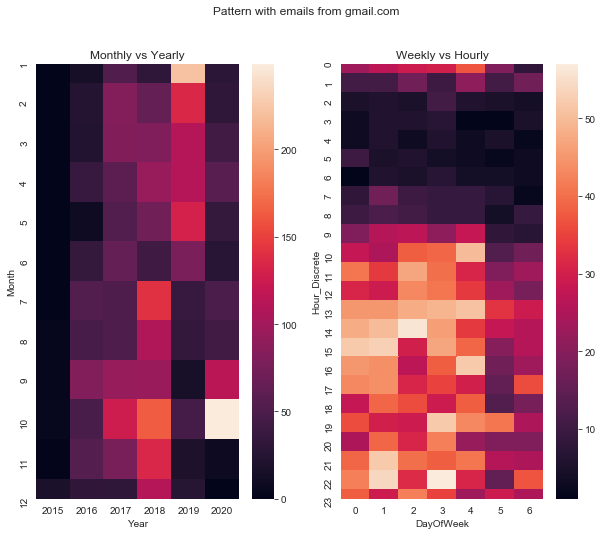

In [274]:
fig, ax = plt.subplots(1,2, figsize=(10,8))
domain = 'gmail.com'
plt.suptitle('Pattern with emails from %s'%domain)
sns.heatmap(mail_df[mail_df.From_Domain==domain].pivot_table(index='Month', columns='Year', values='Message-ID', aggfunc='count', fill_value=0), ax=ax[0])
sns.heatmap(mail_df[mail_df.From_Domain==domain].pivot_table(index='Hour_Discrete', columns='DayOfWeek', values='Message-ID', aggfunc='count', fill_value=0), ax=ax[1])
ax[0].set_title('Monthly vs Yearly')
ax[1].set_title('Weekly vs Hourly')

Text(0.5, 1, 'Weekly vs Hourly')

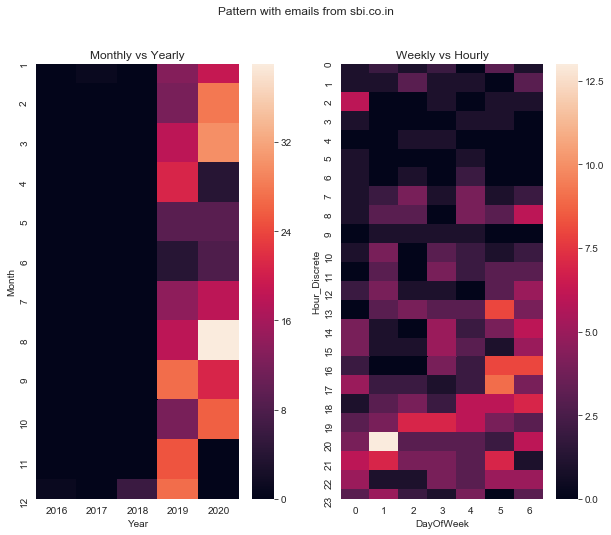

In [275]:
fig, ax = plt.subplots(1,2, figsize=(10,8))
domain = 'sbi.co.in'
plt.suptitle('Pattern with emails from %s'%domain)
sns.heatmap(mail_df[mail_df.From_Domain==domain].pivot_table(index='Month', columns='Year', values='Message-ID', aggfunc='count', fill_value=0), ax=ax[0])
sns.heatmap(mail_df[mail_df.From_Domain==domain].pivot_table(index='Hour_Discrete', columns='DayOfWeek', values='Message-ID', aggfunc='count', fill_value=0), ax=ax[1])
ax[0].set_title('Monthly vs Yearly')
ax[1].set_title('Weekly vs Hourly')